In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(f'cv2: {cv2.__version__}')

cv2: 4.6.0


In [2]:
# Install and import paddleocr
try:
  from paddleocr import PaddleOCR
except:
  !pip install paddleocr
  !pip install paddlepaddle
  from paddleocr import PaddleOCR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 440 kB 4.3 MB/s 
     |████████████████████████████████| 2.2 MB 45.2 MB/s 
     |████████████████████████████████| 619 kB 59.7 MB/s 
     |████████████████████████████████| 4.9 MB 30.0 MB/s 
     |████████████████████████████████| 148 kB 9.2 MB/s 
     |████████████████████████████████| 5.6 MB 11.1 MB/s 
     |████████████████████████████████| 8.8 MB 54.3 MB/s 
     |████████████████████████████████| 88 kB 6.0 MB/s 
     |████████████████████████████████| 965 kB 50.7 MB/s 
     |████████████████████████████████| 399 kB 69.2 MB/s 
     |████████████████████████████████| 204 kB 69.1 MB/s 
     |████████████████████████████████| 132 kB 68.7 MB/s 
     |████████████████████████████████| 2.3 MB 64.4 MB/s 
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=bd5b14a920f2f5bc5a25846e12dada05ea59e93b17af95f68d00fcfb5f0e0bc1


In [3]:
# Define the paths
model_cfg_path = '/content/drive/MyDrive/License Plate Detector/darknet_yolo.cfg' # Config path
model_weights_path = '/content/drive/MyDrive/License Plate Detector/model.weights' # Weights path
class_names_path = '/content/drive/MyDrive/License Plate Detector/class_names' # Class names path
img_path = '/content/drive/MyDrive/License Plate Detector/data/4.jpg' # Input image path

In [4]:
# Get the class names
with open(class_names_path, 'r') as file:
  class_names = [class_name for class_name in file.readlines()]

class_names

['License Plate']

In [5]:
# Reads a network model stored in Darknet model files. 
model = cv2.dnn.readNetFromDarknet(cfgFile=model_cfg_path, darknetModel=model_weights_path)

# cfgFile -> path to the .cfg file with text description of the network architecture
# darknetModel -> path to the .weights file with learned network

In [6]:
# Load the image and get the height and width
img = cv2.imread(img_path) # Load the image

height = img.shape[0] # Get the height of the image
width = img.shape[1] # Get the width of the image

height, width # Print the height and the width of the image

(2124, 2744)

In [7]:
# Convert the image
blob_img = cv2.dnn.blobFromImage(image=img, scalefactor=1/255, size=(416, 416), mean=0, swapRB=True) # Creates 4-dimensional blob from image

# image -> input image 
# scalefactor -> multiplier for image values
# size -> size for output image
# mean -> scalar with mean values which are subtracted from channels

In [8]:
# Detect the license plate
model.setInput(blob_img) # Set the input image

layers = model.getLayerNames() # Get all the layers

output_layers = [layers[i - 1] for i in model.getUnconnectedOutLayers()] # Get indexes of layers with unconnected outputs.

all_detections = model.forward(output_layers) # Get all detections

detections = [detection for detections in all_detections for detection in detections if detection[4] * 10000 > 0.33] # Get the decetions with a confidence score higher than 33%
# For some images the scores are very low so we multiply them by a high number

In [9]:
# Get the bounding boxes, class_ids and confidence_scores
bboxes = []
class_ids = []
scores = []

for detection in detections:

  # Get the bounding box
  bbox = detection[:4]
  x_center, y_center, w, h = bbox
  bbox = [int(x_center * width), int(y_center * height), int(w * width), int(h * height)]

  # Get the box confidence score
  bbox_confidence = detection[4] 
  
  # Get the class index and the class index score
  class_id = np.argmax(detection[5:])
  score = np.amax(detection[5:])

  bboxes.append(bbox)
  class_ids.append(class_id)
  scores.append(score)

In [10]:
# If all the scores for the bboxes are 0 make the first one higher than the 'score_threshold' so it will detect the license plate
if all(item == 0 for item in scores):
    scores[0] = 0.4

In [11]:
# Apply Non Maximum Suppression
indices =	cv2.dnn.NMSBoxes(bboxes=bboxes, scores=scores, score_threshold=0.33, nms_threshold=0.5)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 8.74MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:00<00:00, 18.3MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:00<00:00, 5.33MiB/s]


[2022/12/19 20:14:33] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

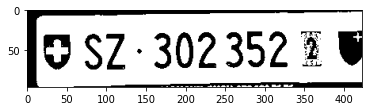

In [12]:
# Get the license plate image and the license plate text
x_center, y_center, w, h = bboxes[indices[0]] # Get the license plate coordinates


license_plate = img[int(y_center - (h / 2)):int(y_center + (h / 2)), int(x_center - (w / 2)):int(x_center + (w / 2)), :].copy() # Crop the license plate
license_plate_gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY) # Convert the license plate image from BGR to GRAY

_, license_plate_thresh = cv2.threshold(license_plate_gray, 150, 255, cv2.THRESH_BINARY) # Apply threshold [If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value]
_, license_plate_thresh_2 = cv2.threshold(license_plate_gray, 64, 255, cv2.THRESH_BINARY) # Second threshold
  
# Get the text from the license plate
final_output = []
ocr = PaddleOCR(use_angle_cls=True, lang='en')
result = ocr.ocr(license_plate_thresh, det=False, cls=False)
if result[0][0][0] == '':
  result = ocr.ocr(license_plate_thresh_2, det=False, cls=False)
for i in range(len(result)):
  result = result[i]
  for line in result:
    final_output.append(f'{"".join(e for e in line[0] if e.isalnum())} - {line[-1]:.2f}')
for i in final_output:
  print(i)


# Plot the original license plate
license_plate = cv2.cvtColor(license_plate_thresh, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(license_plate)

plt.show()

****